Open the data file, read data and create directed graph.

In [23]:
%matplotlib inline
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as op

In [19]:
with open('data.json', 'r') as fo:
    jsdata = json.load(fo)

In [20]:
G = nx.DiGraph()
G.add_edges_from([(d,m['name']) for m in jsdata for d in m['dependencies']])
print('Total number of nodes in the graph:', G.number_of_nodes())

Total number of nodes in the graph: 11961


In the graph, there is a giant component and several small disconnected components. We consider only the giant component. Here we extract the giant component.

In [21]:
G = max(nx.weakly_connected_component_subgraphs(G), key=len)
N = G.number_of_nodes()
print('Size of the giant component:', N)
k_in_list = sorted(G.in_degree().values(), reverse=True)
k_out_list = sorted(G.out_degree().values(), reverse=True)

Size of the giant component: 11412


Functions which are used for calculations are shown in the next cell. 

In [46]:
def lnlike(theta, x, y, yerr):
    C, p, lnf = theta
    model = C * x**p
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

def create_distribution(k_list, nbins):
    hist, be = np.histogram(k_list, bins=nbins)
    k = [(be[i] + be[i+1])/2 for i in range(len(hist))]
    hist_l = []
    k_l = []

    for i in range(len(hist)):  # Remove empty bins
        if hist[i] != 0:
            hist_l.append(hist[i])
            k_l.append(k[i])

    hist = hist_l
    k = k_l
    pk = [f/N for f in hist]
    return k, pk

def calculate_fit(x, y):
    C_true=1.0
    p_true=-2.0
    f_true=1.5
    
    yerr = np.zeros(len(y))  # We do not have y error

    nll = lambda *args: -lnlike(*args)
    result = op.minimize(nll, [C_true, p_true, np.log(f_true)], args=(x, y, yerr))
    C_ml, p_ml, lnf_ml = result["x"]
    return C_ml, p_ml

In [47]:
k_in, pk_in = create_distribution(k_in_list, 1000)
k_out, pk_out = create_distribution(k_out_list, 2000)

Here we make the fit for in and out degrees using maximum likelihood method. Our error in y coordinate is 0.

In [52]:
#C_in, p_in = calculate_fit(k_in, pk_in)
#C_out, p_out = calculate_fit(k_out, pk_out)
#yin = [C_in* k**p_in for k in k_in] 
#yout = [C_out* k**p_out for k in k_out]

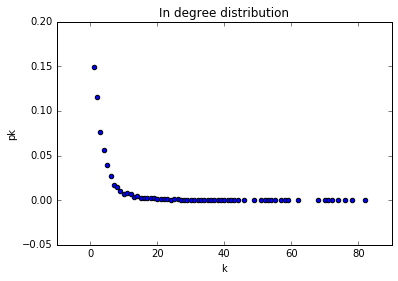

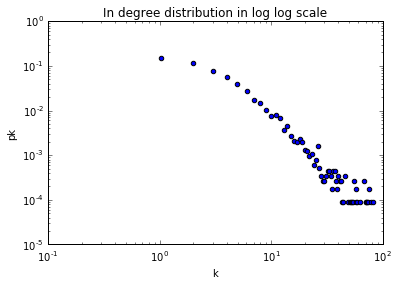

In [33]:
plt.figure()
plt.scatter(k_in, pk_in)
plt.xlabel('k')
plt.ylabel('pk')
plt.title('In degree distribution')

plt.figure()
plt.yscale('log', nonposy='clip')
plt.xscale('log', nonposy='clip')
plt.scatter(k_in, pk_in)
plt.xlabel('k')
plt.ylabel('pk')
plt.title('In degree distribution in log log scale')
plt.show()

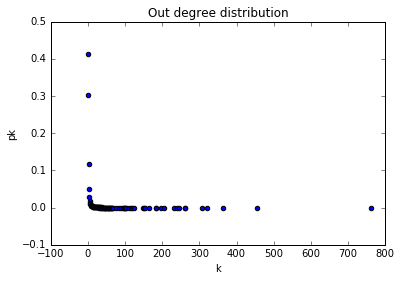

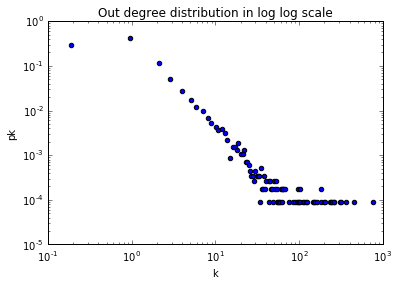

In [45]:
plt.figure()
plt.scatter(k_out, pk_out)
plt.xlabel('k')
plt.ylabel('pk')
plt.title('Out degree distribution')

plt.figure()
plt.yscale('log', nonposy='clip')
plt.xscale('log', nonposy='clip')
plt.scatter(k_out, pk_out)
plt.xlabel('k')
plt.ylabel('pk')
plt.title('Out degree distribution in log log scale')
plt.show()